# K.Lakshmi Swathi
Task-3(To explore unsupervised machine learning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv(r"C:\Users\SWATHI\Desktop\python\Iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(150, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [19]:
X=df.drop('species',axis=1)
y=df['species']

In [20]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


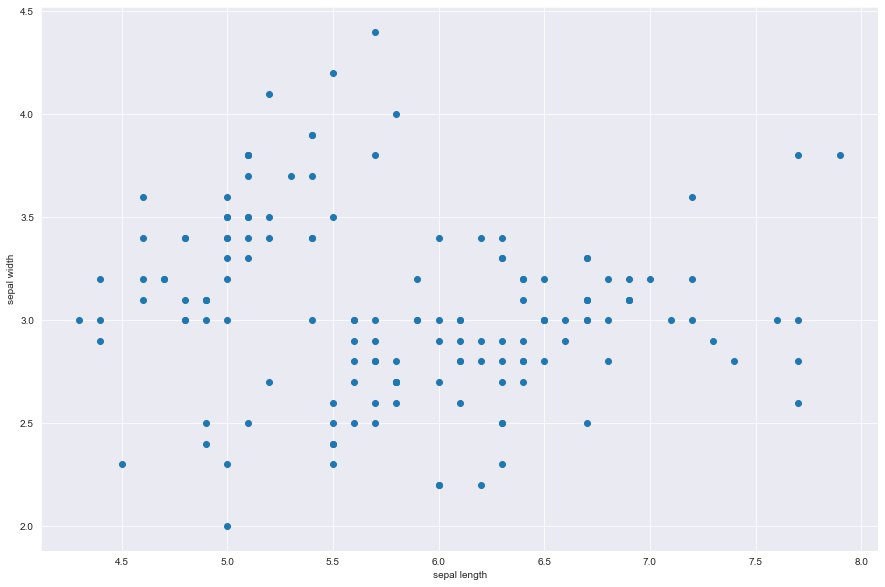

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.scatter(data=X,x='sepal_length',y='sepal_width')
plt.xlabel('sepal length')
plt.ylabel('sepal width');

In [24]:
X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [26]:
wcss = []

cl = 10
 
for i in range(1,cl):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    x=kmeans.inertia_
    wcss.append(x)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.57790500611009,
 91.06677122728537,
 80.23060704506956,
 72.43354626144566,
 63.13148576398818,
 55.62777200516142]

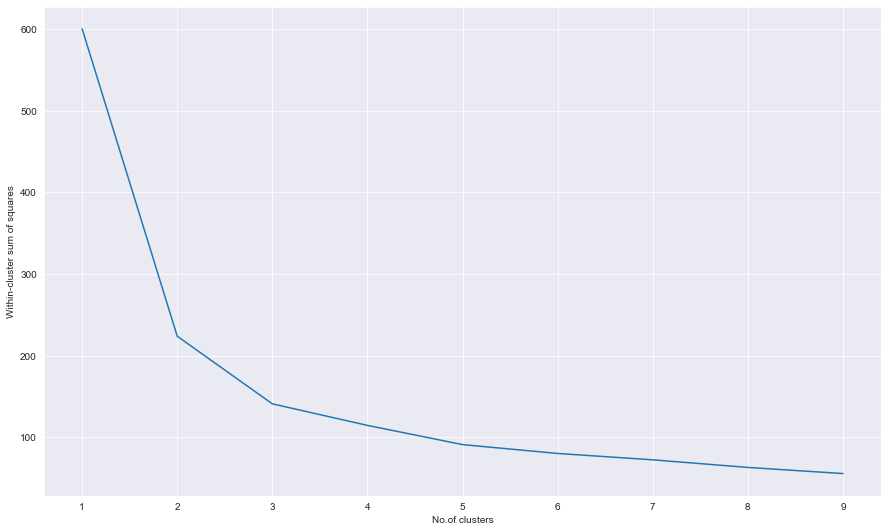

In [27]:
plt.figure(figsize=(15,9))
num_cl = range(1,cl)
plt.plot(num_cl,wcss);
plt.xlabel('No.of clusters')
plt.ylabel('Within-cluster sum of squares');

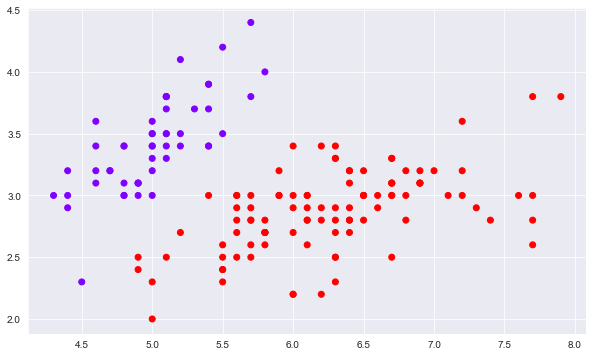

In [28]:
kmeans_2 = KMeans(2)
kmeans_2.fit(X_scaled)

cl_2 = X.copy()

cl_2['pred'] = kmeans_2.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_2['sepal_length'],cl_2['sepal_width'], c= cl_2['pred'], cmap = 'rainbow');

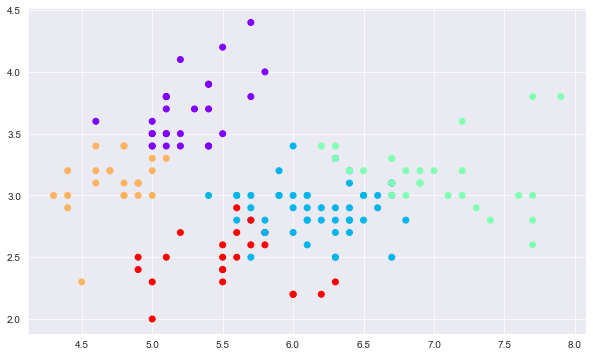

In [29]:
kmeans_5 = KMeans(5)
kmeans_5.fit(X_scaled)

cl_5 = X.copy()

cl_5['pred'] = kmeans_5.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_5['sepal_length'], cl_5['sepal_width'], c= cl_5['pred'], cmap = 'rainbow');
